In [2]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Relacionar la base de datos que esta el github
url= 'https://raw.githubusercontent.com/aledi2024/Repo/refs/heads/main/Datos_paises_ciencia.csv'

In [4]:
#leer el archivo
df = pd.read_csv('https://raw.githubusercontent.com/aledi2024/Repo/refs/heads/main/Datos_paises_ciencia.csv')
#ver el encabezado
df.head()


,id,country_id,row_id,indicator_id,year,value
0,895315,CA,gasto,ES_GAS_SE_PPC,2010,9215.2044
1,895316,CA,gasto,ES_GAS_SE_PPC,2011,9542.7051
2,895317,CA,gasto,ES_GAS_SE_PPC,2012,10393.9978
3,895318,CA,gasto,ES_GAS_SE_PPC,2013,10158.1849
4,895319,CA,gasto,ES_GAS_SE_PPC,2014,10430.6919


In [5]:
# Cargar el archivo CSV
df = pd.read_csv('https://raw.githubusercontent.com/aledi2024/Repo/main/Datos_paises_ciencia.csv')

# Verificar que los datos se han cargado correctamente
print(df.head())

       id country_id row_id   indicator_id  year       value
0  895315         CA  gasto  ES_GAS_SE_PPC  2010   9215.2044
1  895316         CA  gasto  ES_GAS_SE_PPC  2011   9542.7051
2  895317         CA  gasto  ES_GAS_SE_PPC  2012  10393.9978
3  895318         CA  gasto  ES_GAS_SE_PPC  2013  10158.1849
4  895319         CA  gasto  ES_GAS_SE_PPC  2014  10430.6919


In [6]:
# Mostrar la información del DataFrame
print(df.info())

# Mostrar estadísticas descriptivas
print(df.describe())

df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308774 entries, 0 to 308773
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            308774 non-null  int64  
 1   country_id    305406 non-null  object 
 2   row_id        308340 non-null  object 
 3   indicator_id  308774 non-null  object 
 4   year          308774 non-null  int64  
 5   value         308774 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 14.1+ MB
None
                 id           year         value
count  3.087740e+05  308774.000000  3.087740e+05
mean   5.738588e+06    2011.361585  4.884819e+08
std    6.133656e+05       7.856907  1.056604e+11
min    8.953150e+05    1990.000000 -1.551001e+04
25%    5.526791e+06    2008.000000  3.228000e-01
50%    5.934974e+06    2013.000000  2.400000e+01
75%    6.065979e+06    2017.000000  1.975000e+03
max    6.150186e+06    2022.000000  3.517282e+13


(308774, 6)

Lo que se puede observar en principio es que este dataset tiene seis columnas con 308.774 filas, ya que en las filas están los años y los países para poder armar la matriz con la que se podrá trabajar.
El paríodo de tiempo con datos relevados es 1990 (valor mínimo) a 2022 (valor máximo) por lo cual se cuenta con datos para treinta y dos años consecutivos.
Tanto para valor como para años, no se observan valores nulos. Habría que revisar luego que pasa en los faltantes en país (country_id) y row_id, que son objetos.


In [7]:
# Contar los valores únicos en la columna 'country_id' (para ver cuantos países tengo)
num_paises = df['country_id'].nunique()

# Mostrar el resultado
print(f"Número de paises en 'country_id': {num_paises}")

Número de paises en 'country_id': 33


In [8]:
# Contar los valores únicos en la columna 'year' - año (solo para chequear quee sean 32)
anios_unicos = df['year'].unique()
print(f"Años únicos en 'year': {anios_unicos}")


Años únicos en 'year': [2010 2011 2012 2013 2014 2015 2009 2016 2007 2008 2005 2006 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2017
 2018 2019 2022 2020 2021]


In [9]:
# Contar cuántos hay
print(f"Número de años únicos: {len(anios_unicos)}")

Número de años únicos: 33


Eran 33!

In [10]:
# Contar los valores únicos en la columna 'country_id' - para conocer los países
paises_unicos = df['country_id'].unique()
print(f"Años únicos en 'year': {paises_unicos}")

Años únicos en 'year': ['CA' 'US' 'GT' 'TT' 'VE' 'AR' 'CL' 'MX' 'PE' 'PY' 'PT' 'ES' 'PR' 'NI'
 'CU' 'EC' 'UY' 'HN' 'SV' 'DO' 'BB' 'BO' 'PA' 'HT' 'GY' 'CO' 'JM' 'BR'
 'AL' 'IB' 'CR' 'TL' nan 'AM']


In [11]:
# Contar los valores únicos en la columna 'indicator_id' - para saber que indicadores tengo
indicadores_unicos = df['indicator_id'].unique()
print(f"indicadores únicos en 'yearindicator_id': {indicadores_unicos}")

indicadores únicos en 'yearindicator_id': ['ES_GAS_SE_PPC' 'ES_GASIDSEPER' 'ES_GASIDSFPER' 'ES_INVESTPFSEPER'
 'ES_INVESTEJCSEPER' 'ES_INVESTPFSEPER_E' 'ES_INVESTEJCSEPER_E' 'IDCCSONG'
 'ES_GRADUSECUN' 'ES_ESTUDSECUN' 'GRADUADOS' 'CBIOSIS' 'ES_GAS_ES_PPC'
 'CSCOPUSUN' 'CSCOPUSUNAC' 'ES_UNIV_PUB_INV' 'ES_UNIV_PUB_INVEJC'
 'PERSOEJC' 'PERSOEJCGEN' 'PATENTES' 'PERSOPF' 'dig_cobertura_tipo_t'
 'dig_prop_hogares_acc' 'dig_susc_banda_ancha' 'dig_susc_banda_movil'
 'dig_educ' 'dig_educ_gender' 'dig_pisa' 'dig_cit_scopus'
 'dig_cit_scopus_tot' 'dig_doc_scopus_tot' 'dig_patents'
 'dig_patents_area' 'dig_goods_exp' 'dig_goods_exp_dig'
 'dig_indiv_us_int_are' 'dig_indiv_us_int_eda' 'dig_indiv_us_int_gen'
 'dig_indiv_us_interne' 'dig_m2m_network_susc' 'POBLA' 'CTx_TC' 'GASIDOS2'
 'ID_colab' 'TIPO_ACT' 'TIPO_SCT' 'PEA' 'PBI' 'GASID' 'GASACT' 'GASIDSF'
 'GASACTSF' 'GASIDSE' 'GASACTSE' 'IDSED' 'IDSEG' 'IDSEM' 'IDDISBUS'
 'IDDISEDU' 'IDDISGOB' 'GASIDDISC' 'IDCOSEDU' 'IDCOSSEC' 'IDTIPBUS'
 'IDTIPEDU' '

In [12]:
#Hacer un primer diccionario con indicadores de interés:
# Lista de indicadores como tuplas
indicadores1 = [
    ('CDCODBUS', 'C', 'PERCENTAGE', 'CTI_IMD', 'Gasto en I+D por tipo de investigación, ejecutado por el Sector Empresas (Publicas y Privadas)', 'R&D Expenditure by type of R&D, performed by business sector', 34, 1, 'Gasto en I+D por tipo de investigación, ejecutado por el Sector Empresas (Publicas y Privadas)', 'R&D Expenditure by type of R&D, performed by business sector', 0),
    ('CDCOSBUS', 'C', 'PERCENTAGE', 'CTI_IMD', 'Gasto en I+D por tipo de costos, ejecutado por Sector EMPRESAS (Públicas y Privadas)', 'R&D expenditure by type of costs, performed by business enterprise (public and private)', 24, 1, 'Gasto en I+D por tipo de costos, ejecutado por Sector EMPRESAS (Públicas y Privadas)', 'R&D expenditure by type of costs, performed by business enterprise (public and private)', 0),
    ('CDCOSEDU', 'C', 'PERCENTAGE', 'CTI_IMD', 'Gasto en I+D por tipo de costos, ejecutado por Sector Educación Superior', 'R&D expenditure by type of costs, performed by higher education', 26, 1, 'Gasto en I+D por tipo de costos, ejecutado por Sector Educación Superior', 'R&D expenditure by type of costs, performed by higher education', 0),
    ('CDCOSONG', 'C', 'PERCENTAGE', 'CTI_IMD', 'Gasto en I+D por tipo de costos, ejecutado por Sector Org. Privadas sin fines de lucro', 'R&D expenditure by type of costs, performed by private non-profit', 28, 1, 'Gasto en I+D por tipo de costos, ejecutado por Sector Org. Privadas sin fines de lucro', 'R&D expenditure by type of costs, performed by private non-profit', 0),
    ('CDCOSSEC', 'C', 'PERCENTAGE', 'CTI_IMD', 'Gasto en I+D por tipo de costos, ejecutado por Sector Gobierno', 'R&D expenditure by type of costs, performed by government sector', 22, 1, 'Gasto en I+D por tipo de costos, ejecutado por Sector Gobierno', 'R&D expenditure by type of costs, performed by government sector', 0),
    ('CDDISBUS', 'C', 'PERCENTAGE', 'CTI_IMD', 'Gasto en I+D por disciplina científica, ejecutada por Sector EMPRESAS (Públicas y Privadas)', 'R&D expenditure by field of research & development, performed by business sector', 44, 1, 'Gasto en I+D por disciplina científica, ejecutada por Sector EMPRESAS (Públicas y Privadas)', 'R&D expenditure by field of research & development, performed by business sector', 0),
    ('CDDISEDU', 'C', 'PERCENTAGE', 'CTI_IMD', 'Gasto en I+D por disciplina científica, ejecutada por Sector Educación Superior', 'R&D expenditure by field of research & development, performed by higher education', 46, 1, 'Gasto en I+D por disciplina científica, ejecutada por Sector Educación Superior', 'R&D expenditure by field of research & development, performed by higher education', 0),
    ('CDDISONG', 'C', 'PERCENTAGE', 'CTI_IMD', 'Gasto en I+D por disciplina científica, ejecutada por Sector ORG. PRIVADAS SIN FINES DE LUCRO', 'R&D expenditure by field of research & development, performed by private non-profit', 48, 1, 'Gasto en I+D por disciplina científica, ejecutada por Sector ORG. PRIVADAS SIN FINES DE LUCRO', 'R&D expenditure by field of research & development, performed by private non-profit', 0),
    ('CDOCTORADO', 'C', 'THINGS', 'CTI_GRD', 'Doctorados', 'Doctorates', 35, 1, 'Número de personas que se gradúa cada año en programas de doctorado, clasificados por área de la ciencia y la tecnología.', 'Number of people who graduate each year in doctoral programs, classified by area of science and technology.', 0),
    ('CDTIPGOB', 'C', 'PERCENTAGE', 'CTI_IMD', 'Gasto en I+D por tipo de investigación, ejecutado por Sector Gobierno', 'R&D expenditure by type of research, performed by government sector', 32, 1, 'Gasto en I+D por tipo de investigación, ejecutado por Sector Gobierno', 'R&D expenditure by type of research, performed by government sector', 0),
    ('CGRADO', 'C', 'THINGS', 'CTI_GRD', 'Titulados de grado', 'First level university graduates', 33, 1, 'Número de personas que se gradúa cada año en carreras universitarias de grado, de cuatro o más años de duración, clasificados por área de la ciencia y la tecnología.', 'Number of people graduating each year in bachelor\'s degree, four or more years of duration, classified by area of science and technology.', 0)
]

# Crear un diccionario a partir de las tuplas
diccionario_indicadores1 = {
    codigo: {
        'tipo': tipo,
        'unidad': unidad,
        'categoria': categoria,
        'descripcion_es': descripcion_es,
        'descripcion_en': descripcion_en,
        'codigo_cti': codigo_cti,
        'orden': orden,
        'nota_es': nota_es,
        'nota_en': nota_en,
        'valor_inicial': valor_inicial
    }
    for (codigo, tipo, unidad, categoria, descripcion_es, descripcion_en, codigo_cti, orden, nota_es, nota_en, valor_inicial) in indicadores1
}

# Mostrar el diccionario
for codigo, info in diccionario_indicadores1.items():
    print(f"{codigo}: {info}")


CDCODBUS: {'tipo': 'C', 'unidad': 'PERCENTAGE', 'categoria': 'CTI_IMD', 'descripcion_es': 'Gasto en I+D por tipo de investigación, ejecutado por el Sector Empresas (Publicas y Privadas)', 'descripcion_en': 'R&D Expenditure by type of R&D, performed by business sector', 'codigo_cti': 34, 'orden': 1, 'nota_es': 'Gasto en I+D por tipo de investigación, ejecutado por el Sector Empresas (Publicas y Privadas)', 'nota_en': 'R&D Expenditure by type of R&D, performed by business sector', 'valor_inicial': 0}
CDCOSBUS: {'tipo': 'C', 'unidad': 'PERCENTAGE', 'categoria': 'CTI_IMD', 'descripcion_es': 'Gasto en I+D por tipo de costos, ejecutado por Sector EMPRESAS (Públicas y Privadas)', 'descripcion_en': 'R&D expenditure by type of costs, performed by business enterprise (public and private)', 'codigo_cti': 24, 'orden': 1, 'nota_es': 'Gasto en I+D por tipo de costos, ejecutado por Sector EMPRESAS (Públicas y Privadas)', 'nota_en': 'R&D expenditure by type of costs, performed by business enterprise (

In [13]:
# Filtrar datos para el año 2021 y excluir los países AM, AL y XX ya que estos tres son regiones: América Latina, América Latina y el Caribe, y Total
df_2021 = df[(df['year'] == 2021) & (~df['country_id'].isin(['AM', 'AL', 'XX']))]

In [14]:
# Pivotar el DataFrame
df_pivot = df.pivot_table(index='country_id', columns='indicator_id', values='value', fill_value=0)

# Filtrar para el año 2021 
df_2021 = df[df['year'] == 2021]

# Filtrar para los países excluidos
df_2021 = df_2021.loc[~df_2021['country_id'].isin(['AM', 'AL', 'XX', 'IB','TL'])]

# Mostrar el DataFrame pivotado
print(df_pivot)




indicator_id  ACTxINNOVxMANUF  ACTxINNOVxSERV     APOEJCSE        APOPFSE  \
country_id                                                                  
AL                   0.000000        0.000000     0.000000       0.000000   
AM                   0.000000        0.000000     0.000000       0.000000   
AR                   0.125000        0.000000  2090.800000    2090.800000   
BB                   0.000000        0.000000     0.000000       0.000000   
BO                   0.000000        0.000000    51.960833     125.678571   
BR                   0.000000        0.000000     0.000000       0.000000   
CA                   0.000000        0.000000  6499.404762       0.000000   
CL                   0.166617        0.166683   501.918636     743.221400   
CO                   0.111113        0.142857     0.000000       0.000000   
CR                   0.000000        0.000000     0.000000     347.195122   
CU                   0.000000        0.000000     0.000000       0.000000   

In [15]:
# Filtrar para los países excluidos
df_2021 = df_2021.loc[~df_2021['country_id'].isin(['AM', 'AL', 'XX'])]

# Pivotar nuevamente si es necesario
df_pivot = df_2021.pivot_table(index='country_id', columns='indicator_id', values='value', aggfunc='sum', fill_value=0)



IMPORTANTE: Primero se intento hacer para el año 2022, que es el dato mas reciente pero solo había datos para un país (Trinidad y Tobago, por lo cual decidi cambiar de año a 2021. Allí cuando veo el gráfico se evidencia que salen todos los indicadoresm por lo cual cambio el nombre del diccionarkio a Indicadores1 que es solo un Grupo de indicadores que refiere a el Gasto en I+D por sector que lo ejecuta y por disciplina.)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11556\1498250031.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


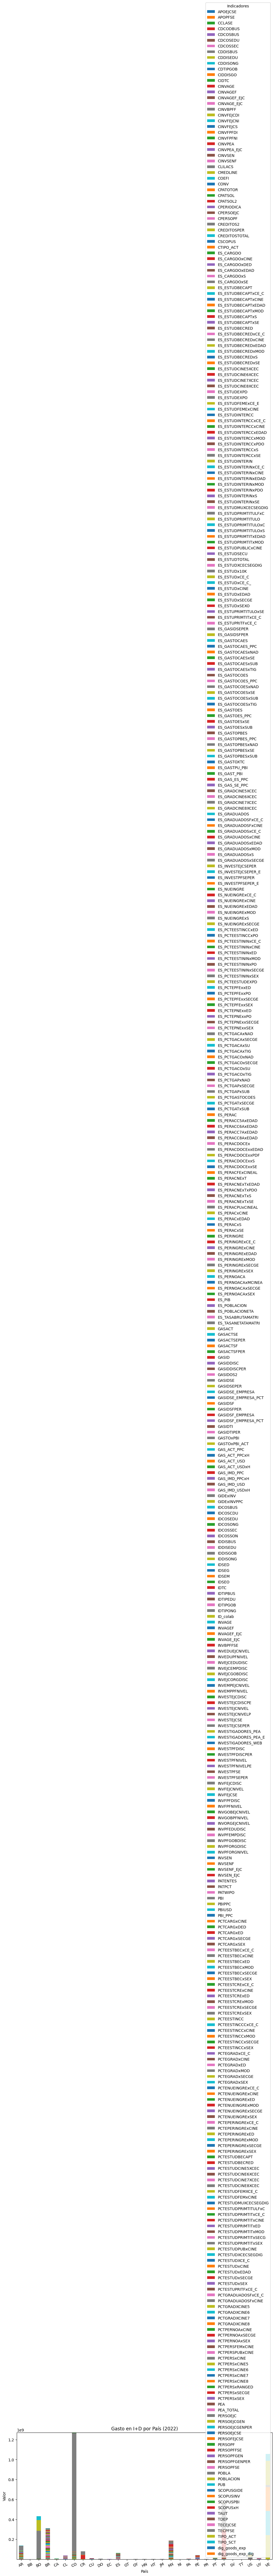

In [16]:
# Crear gráfico de barras apiladas
df_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))

# Personalizar el gráfico
plt.title('Gasto en I+D por País (2022)')
plt.xlabel('País')
plt.ylabel('Valor')
plt.xticks(rotation=25)
plt.legend(title='Indicadores')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [28]:
# Mostrar las columnas del DataFrame pivotado
print("Columnas del DataFrame pivotado:")
print(df_pivot.columns)

Columnas del DataFrame pivotado:
Index(['APOEJCSE', 'APOPFSE', 'CCLASE', 'CDCODBUS', 'CDCOSBUS', 'CDCOSEDU',
       'CDCOSSEC', 'CDDISBUS', 'CDDISEDU', 'CDDISONG',
       ...
       'SCOPUSPBI', 'SCOPUSxH', 'TAUT', 'TDEP', 'TECEJCSE', 'TECPFSE',
       'TIPO_ACT', 'TIPO_SCT', 'dig_goods_exp', 'dig_goods_exp_dig'],
      dtype='object', name='indicator_id', length=442)


Con este resultado es evidente que hay que filtrar tambien los indicadores, pero es revisar los países con las barras mas altas (es decir cuya sumatoria de valores es significativamente superior al resto)

In [27]:
columnas_lista = df_pivot.columns.tolist()
print("Columnas en formato de lista:", columnas_lista)


Columnas en formato de lista: ['APOEJCSE', 'APOPFSE', 'CCLASE', 'CDCODBUS', 'CDCOSBUS', 'CDCOSEDU', 'CDCOSSEC', 'CDDISBUS', 'CDDISEDU', 'CDDISONG', 'CDTIPGOB', 'CIDDISGO', 'CIDTC', 'CINVAGE', 'CINVAGEF', 'CINVAGEF_EJC', 'CINVAGE_EJC', 'CINVBPFF', 'CINVFEJCDI', 'CINVFEJCNI', 'CINVFEJCS', 'CINVFPFDI', 'CINVFPFNI', 'CINVPEA', 'CINVPEA_EJC', 'CINVSEN', 'CINVSENF', 'CLILACS', 'CMEDLINE', 'COEFI', 'CONV', 'CPATOTOR', 'CPATSOL', 'CPATSOL2', 'CPERIODICA', 'CPERSOEJC', 'CPERSOPF', 'CREDITOS2', 'CREDITOSPER', 'CREDITOSTOTAL', 'CSCOPUS', 'CTIPO_ACT', 'ES_CARGDO', 'ES_CARGDOxCINE', 'ES_CARGDOxDED', 'ES_CARGDOxEDAD', 'ES_CARGDOxS', 'ES_CARGDOxSE', 'ES_ESTUDBECAPT', 'ES_ESTUDBECAPTxCE_C', 'ES_ESTUDBECAPTxCINE', 'ES_ESTUDBECAPTxEDAD', 'ES_ESTUDBECAPTxMOD', 'ES_ESTUDBECAPTxS', 'ES_ESTUDBECAPTxSE', 'ES_ESTUDBECRED', 'ES_ESTUDBECREDxCE_C', 'ES_ESTUDBECREDxCINE', 'ES_ESTUDBECREDxEDAD', 'ES_ESTUDBECREDxMOD', 'ES_ESTUDBECREDxS', 'ES_ESTUDBECREDxSE', 'ES_ESTUDCINE5XCEC', 'ES_ESTUDCINE6XCEC', 'ES_ESTUDCINE7X

In [29]:
print("Columnas en df_pivot:")
print(df_pivot.columns)

Columnas en df_pivot:
Index(['APOEJCSE', 'APOPFSE', 'CCLASE', 'CDCODBUS', 'CDCOSBUS', 'CDCOSEDU',
       'CDCOSSEC', 'CDDISBUS', 'CDDISEDU', 'CDDISONG',
       ...
       'SCOPUSPBI', 'SCOPUSxH', 'TAUT', 'TDEP', 'TECEJCSE', 'TECPFSE',
       'TIPO_ACT', 'TIPO_SCT', 'dig_goods_exp', 'dig_goods_exp_dig'],
      dtype='object', name='indicator_id', length=442)


In [33]:


#Pivotear la tabla (tabla dinámica) 
df_pivot = df_2021.pivot_table(index='country_id', columns='indicator_id', values='value', aggfunc='sum', fill_value=0)




In [34]:
print("Columnas en df_pivot:")
print(df_pivot.columns)

Columnas en df_pivot:
Index(['APOEJCSE', 'APOPFSE', 'CCLASE', 'CDCODBUS', 'CDCOSBUS', 'CDCOSEDU',
       'CDCOSSEC', 'CDDISBUS', 'CDDISEDU', 'CDDISONG',
       ...
       'SCOPUSPBI', 'SCOPUSxH', 'TAUT', 'TDEP', 'TECEJCSE', 'TECPFSE',
       'TIPO_ACT', 'TIPO_SCT', 'dig_goods_exp', 'dig_goods_exp_dig'],
      dtype='object', name='indicator_id', length=442)


In [69]:
# Filtrar indicadores ya que hay demasiada cantidad de ellos
indicadores_seleccionados = [
    'CDCODBUS', 'CDCOSBUS', 'CDCOSEDU', 'CDCOSONG', 
    'CDCOSEC', 'CDDISBUS', 'CDDISEDU', 'CDDISONG', 
    'CDOCTORADO', 'CDTIPGOB', 'CGRADO'
]


In [70]:
indicadores_seleccionados_filtrados = [indicador for indicador in indicadores_seleccionados if indicador in df_pivot.columns]

In [71]:
# 4. Imprimir indicadores válidos
print("Indicadores válidos para graficar:")
print(indicadores_seleccionados_filtrados)


Indicadores válidos para graficar:
['CDCODBUS', 'CDCOSBUS', 'CDCOSEDU', 'CDDISBUS', 'CDDISEDU', 'CDDISONG', 'CDTIPGOB']


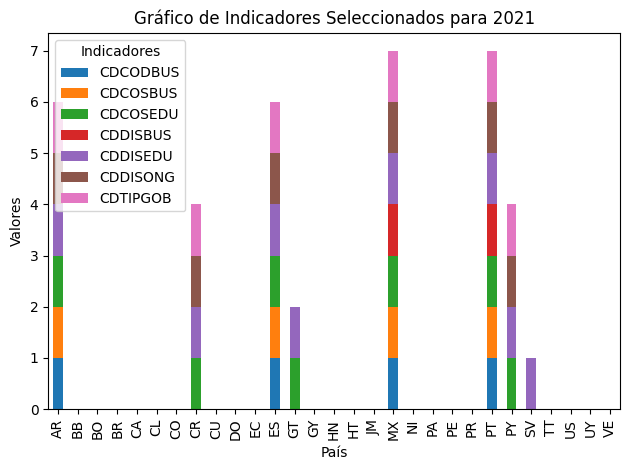

In [72]:
if not indicadores_seleccionados_filtrados:
    print("No se encontraron indicadores válidos para graficar.")
else:
    df_pivot_filtrado = df_pivot[indicadores_seleccionados_filtrados]

    # Graficar
    df_pivot_filtrado.plot(kind='bar', stacked=True)
    plt.title('Gráfico de Indicadores Seleccionados para 2021')
    plt.xlabel('País')
    plt.ylabel('Valores')
    plt.legend(title='Indicadores')
    plt.tight_layout()  # Ajustar el layout
    plt.show()

In [81]:
indicadores_seleccionados2 = [
    'PBIPPC','INVESTIGADORES_PEA'
]

In [82]:
indicadores_seleccionados_filtrados2 = [indicador for indicador in indicadores_seleccionados2 if indicador in df_pivot.columns]
# 4. Imprimir indicadores válidos
print("Indicadores válidos para graficar:")
print(indicadores_seleccionados_filtrados2)

Indicadores válidos para graficar:
['PBIPPC', 'INVESTIGADORES_PEA']


In [103]:
# Filtrar la base con los indicadores seleccionados
df_pivot_filtrado2 = df_pivot[indicadores_seleccionados_filtrados2]

df_pivot_filtrado2.columns

Index(['PBIPPC', 'INVESTIGADORES_PEA'], dtype='object', name='indicator_id')

In [106]:
# Agrupar los datos por país y año para obtener la suma de PBIPPC e INVESTIGADORES_PEA
df_grouped = df_pivot_filtrado2.groupby(['country_id', 'year'])[['PBIPPC', 'INVESTIGADORES_PEA']].sum().reset_index()



KeyError: 'year'

In [ ]:
# Pivotear el DataFrame para tener los años como columnas
df_pivot = df_grouped.pivot(index='country_id', columns='year', values=['PBIPPC', 'INVESTIGADORES_PEA'])